<a href="https://colab.research.google.com/github/FLC-ML/practicespace/blob/master/Time_Series_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN/LSTM Time Series Classification.

Proof of concept.

# Load Data

In [1]:
# Training Data
!wget https://www.dropbox.com/sh/gmgduvzyl5tken6/AAD6E17hrD8CfKwmRB9wfTKqa/X_reference.npy
!wget https://www.dropbox.com/sh/gmgduvzyl5tken6/AACaXFPq1qA5kLvhIF0Y0NfEa/y_reference.npy
# Testing Data
!wget https://www.dropbox.com/sh/gmgduvzyl5tken6/AABKsseO9QvObI4lTt-yXg8ta/X_test.npy
!wget https://www.dropbox.com/sh/gmgduvzyl5tken6/AACitgFQG5cfd7qs--swRbI0a/y_test.npy

--2020-07-03 01:39:35--  https://www.dropbox.com/sh/gmgduvzyl5tken6/AAD6E17hrD8CfKwmRB9wfTKqa/X_reference.npy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/gmgduvzyl5tken6/AAD6E17hrD8CfKwmRB9wfTKqa/X_reference.npy [following]
--2020-07-03 01:39:35--  https://www.dropbox.com/sh/raw/gmgduvzyl5tken6/AAD6E17hrD8CfKwmRB9wfTKqa/X_reference.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf7a2e0daa47a92a6af00d3f989.dl.dropboxusercontent.com/cd/0/inline/A6zkG35722O3X1hCu4Pv0W83nQRACvUDrAd__LZaeCZM2xHgLkJ-uP5XN5tvM5NswmtZNqQbmP7JzzrBCy2SyR4EsHXNeI_7rzu-e77vo1Rj59nY4g-iD-eo-FW4uvEoi5U/file# [following]
--2020-07-03 01:39:36--  https://ucf7a2e0daa47a92a6af00d3f989.dl.dropboxusercontent.com/cd/0/inline/A6zkG35722O3X1hCu4Pv0

In [2]:
# Importing libraries
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

from sklearn.metrics import confusion_matrix
import itertools

import numpy as np
import matplotlib.pyplot as plt # Use pip install to get this.
from matplotlib import cm
import pandas as pd

In [3]:
# If you want to check directory.
!ls

sample_data	   X_test.npy	    y_reference.npy.1  y_test.npy.2
X_reference.npy    X_test.npy.1     y_reference.npy.2
X_reference.npy.1  X_test.npy.2     y_test.npy
X_reference.npy.2  y_reference.npy  y_test.npy.1


In [4]:
### Load the data:
# Training data
X_train_loc = 'X_reference.npy'
y_train_loc = 'y_reference.npy'
X_train = np.load(X_train_loc)
y_train = np.load(y_train_loc)
# Testing data
X_test_loc = 'X_test.npy'
y_test_loc = 'y_test.npy'
X_test = np.load(X_test_loc)
y_test = np.load(y_test_loc)
# Print shape of data loaded.
print("training set shape:", X_train.shape, y_train.shape)
print("test set shape:", X_test.shape, y_test.shape)
# The data is only 2D
X_train = np.expand_dims(X_train, -1) # adds a superficial dimension to convolve
X_test = np.expand_dims(X_test, -1)
print("\nnew x shape:", X_train.shape)

training set shape: (60000, 1000) (60000,)
test set shape: (3000, 1000) (3000,)

new x shape: (60000, 1000, 1)


In [10]:
### Build the Model
i = Input(shape=X_train[0].shape)
x = LSTM(100)(i)
x = Dense(30, activation='softmax')(x)

model = Model(i, x)

In [11]:
### Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)


Epoch 1/100
1875/1875 [==============================] - 67s 36ms/step - loss: 3.2239 - accuracy: 0.0842 - val_loss: 3.3995 - val_accuracy: 0.0333
Epoch 2/100
1875/1875 [==============================] - 67s 36ms/step - loss: 2.9885 - accuracy: 0.1349 - val_loss: 3.1896 - val_accuracy: 0.0953
Epoch 3/100
1875/1875 [==============================] - 67s 36ms/step - loss: 2.2199 - accuracy: 0.3140 - val_loss: 3.5567 - val_accuracy: 0.1077
Epoch 4/100
1875/1875 [==============================] - 67s 35ms/step - loss: 2.0424 - accuracy: 0.3624 - val_loss: 3.6914 - val_accuracy: 0.1300
Epoch 5/100
1875/1875 [==============================] - 66s 35ms/step - loss: 1.7710 - accuracy: 0.4362 - val_loss: 3.6170 - val_accuracy: 0.1323
Epoch 6/100
1875/1875 [==============================] - 67s 36ms/step - loss: 1.4832 - accuracy: 0.5134 - val_loss: 3.4112 - val_accuracy: 0.1900
Epoch 7/100
1875/1875 [==============================] - 67s 36ms/step - loss: 1.2269 - accuracy: 0.5810 - val_loss: 3

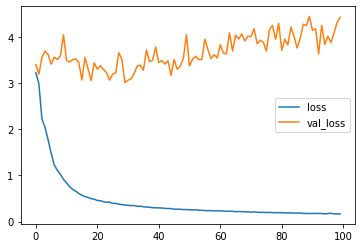

In [12]:
### Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

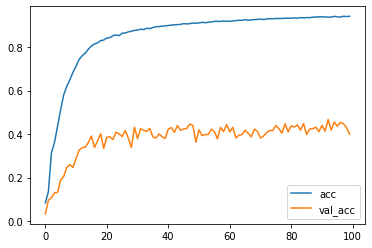

In [13]:
### Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[ 85   1   0   0   0   1   0   0   0   0   0   0   0   1   0   0   0   0
    0   2   0   0   0   0  10   0   0   0   0   0]
 [ 94   5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   1   0   0   0   0   0   0   0   0   0   0]
 [  0   0  26   5   6   0   1   3   2  14   4   0   0   0   2   0   0   1
    1  16   0   0  15   1   1   1   0   0   1   0]
 [  0   0   0  98   0   0   0   0   0   2   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   6   5  54   0   0   0   4   6   6   0   0   0   0   0   0   1
    0  12   0   0   4   0   0   0   1   0   0   1]
 [  0   0   0   0   0 100   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0  24  39   1   0   0   1   0   0   0   0   0   0   0
    0   4   0   0   0  19  11   0   0   0   0   0]
 [  1   0   0   0   0   2  34  27   0   0   2   0   0   0   0   0   0   1
    0   9  

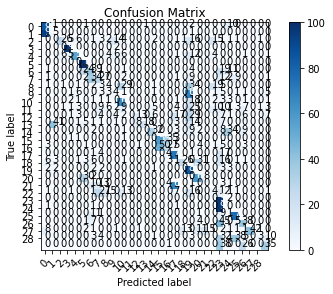

(30, 30)

In [14]:
# Plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(29)))

cm.shape